In [1]:
!pip install pymongo

In [2]:
!pip install matplotlib seaborn
#!pip install geopy

In [5]:
import json# TO READ JSON TO JUPYTER NOTEBOOK
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# CREATE FUNCTION TO IMPORT JSON FLIE 

In [7]:
#define a function that takes the path to the JSON file as an argument
def import_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            json_content = json.load(file)
        return json_content
    except FileNotFoundError as e:
        print("File not found")
        return None
    except json.JSONDecodeError as e:
        print(f"JSON decoding error: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
    
file_path = 'C:/Users/Admin/Desktop/DAP PROJECT/nypd-shooting-incident.json'

try:
    json_content = import_json_file(file_path)
    if json_content:
        print("JSON data successfully imported:")
        #print(json_content)
except Exception as e:
        print(f"An error occurred: {e}")

JSON data successfully imported:


In [8]:
#import json

# Define a function to import a JSON file
def import_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            json_content = json.load(file)  # Load the JSON content from the file
        return json_content
    except FileNotFoundError:
        print("File not found")
    except json.JSONDecodeError as json_error:
        print(f"Error decoding JSON: {json_error}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Name of the file from the filepath
file_path = 'C:/Users/Admin/Desktop/DAP PROJECT/nypd-shooting-incident.json'

try:
    json_content = import_json_file(file_path)
    if json_content:
        print(json.dumps(json_content, indent=2))  # Print the JSON content with indentation for better readability
except Exception as e:
    print(f"An error occurred: {e}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# CONNECT TO MONGODB

In [9]:

from pymongo import MongoClient


In [10]:
# initiating connection to Mongodb
client = MongoClient("mongodb://localhost:27017/")



In [11]:
print(client)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [12]:
# name of database and collection
ET_db = client["ETINOSA"]
collection = ET_db["nypd-shooting-incident"]

In [13]:
# Check if Collection Exists
colList = ET_db.list_collection_names()
colList

['nypd-shooting-incident']

# IMPORT DATA TO MONGODB

In [14]:
# Read json file (Dataset)
with open(file_path, 'r') as file:
    data = json.load(file)


In [ ]:
#now we insert into Mongodb
#collection.insert_many(data)
def json2dict(jsondata):
    data = []
    for item in jsondata:
        row = {
               "incident_key":item[8],
             "OCCUR_DATE":item[9],
            "OCCUR_TIME":item[10],
            "BORO":item[11],
            "LOC_OF_OCCUR_DESC":item[12],
            "PRECINCT":item[13],
            "JURISDICTION_CODE":item[14],
            "LOC_CLASSFCTN_DESC":item[15],
            "LOCATION_DESC":item[16],
            "STATISTICAL_MURDER_FLAG":item[17],
            "PERP_AGE_GROUP":item[18],
            "PERP_SEX":item[19],
            "PERP_RACE":item[20],
            "VIC_AGE_GROUP":item[21],
            "VIC_SEX":item[22],
            "VIC_RACE":item[23],
            "X_COORD_CD":item[24],
            "Y_COORD_CD":item[25],
            "Latitude":item[26],
            "Longitude":item[27],
            "Lon_Lat":item[28],
            
        }
        data.append(row)
    return data

Data_Dict = json2dict(data["data"])
collection.insert_many(Data_Dict)

# Retrieve Data from MongoDB and Add to DataFrame

In [15]:
collection = 'nypd-shooting-incident'

if collection in colList:
  print(f"The collection { collection} data present.")
else:
    print(f"The collection { collection} NOT present.")

The collection nypd-shooting-incident data present.


In [16]:
# Specify the database and collection
my_db = client["ETINOSA"]  
collection = my_db["nypd-shooting-incident"]

In [17]:
# Now you can execute the query
cursor = collection.find()

In [18]:
data=list(cursor)
data

[{'_id': ObjectId('6579cda7ddf390a0ca521275'),
  'incident_key': '228798151',
  'OCCUR_DATE': '2021-05-27T00:00:00',
  'OCCUR_TIME': '21:30:00',
  'BORO': 'QUEENS',
  'LOC_OF_OCCUR_DESC': None,
  'PRECINCT': '105',
  'JURISDICTION_CODE': '0',
  'LOC_CLASSFCTN_DESC': None,
  'LOCATION_DESC': None,
  'STATISTICAL_MURDER_FLAG': False,
  'PERP_AGE_GROUP': None,
  'PERP_SEX': None,
  'PERP_RACE': None,
  'VIC_AGE_GROUP': '18-24',
  'VIC_SEX': 'M',
  'VIC_RACE': 'BLACK',
  'X_COORD_CD': '1058925',
  'Y_COORD_CD': '180924',
  'Latitude': '40.662964620000025',
  'Longitude': '-73.73083868899994',
  'Lon_Lat': 'POINT (-73.73083868899994 40.662964620000025)'},
 {'_id': ObjectId('6579cda7ddf390a0ca521276'),
  'incident_key': '137471050',
  'OCCUR_DATE': '2014-06-27T00:00:00',
  'OCCUR_TIME': '17:40:00',
  'BORO': 'BRONX',
  'LOC_OF_OCCUR_DESC': None,
  'PRECINCT': '40',
  'JURISDICTION_CODE': '0',
  'LOC_CLASSFCTN_DESC': None,
  'LOCATION_DESC': None,
  'STATISTICAL_MURDER_FLAG': False,
  'PERP_A

In [19]:
#dfnypd = pd.DataFrame(list(cursor))# data to dataframe

dfnypd = pd.DataFrame(data)# data to dataframe

In [20]:
dfnypd.shape

(27312, 22)

# DATA CLEANING AND EXPLORATION

In [21]:
dfnypd.head()

_id incident_key           OCCUR_DATE OCCUR_TIME  \
0  6579cda7ddf390a0ca521275    228798151  2021-05-27T00:00:00   21:30:00   
1  6579cda7ddf390a0ca521276    137471050  2014-06-27T00:00:00   17:40:00   
2  6579cda7ddf390a0ca521277    147998800  2015-11-21T00:00:00   03:56:00   
3  6579cda7ddf390a0ca521278    146837977  2015-10-09T00:00:00   18:30:00   
4  6579cda7ddf390a0ca521279     58921844  2009-02-19T00:00:00   22:58:00   

     BORO LOC_OF_OCCUR_DESC PRECINCT JURISDICTION_CODE LOC_CLASSFCTN_DESC  \
0  QUEENS              None      105                 0               None   
1   BRONX              None       40                 0               None   
2  QUEENS              None      108                 0               None   
3   BRONX              None       44                 0               None   
4   BRONX              None       47                 0               None   

  LOCATION_DESC  ...  PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0          None  ...      None      None         18-24       M   
1          None  ...      None      None         18-24       M   
2          None  ...      None      None         25-44       M   
3          None  ...      None      None           <18       M   
4          None  ...         M     BLACK         45-64       M   

         VIC_RACE               X_COORD_CD              Y_COORD_CD  \
0           BLACK                  1058925                  180924   
1           BLACK  1005028.000000000000000  234516.000000000000000   
2           WHITE  1007667.937500000000000  209836.531250000000000   
3  WHITE HISPANIC  1006537.375000000000000  244511.140625000000000   
4           BLACK  1024921.812500000000000  262189.406250000000000   

             Latitude            Longitude  \
0  40.662964620000025   -73.73083868899994   
1  40.810351863000051  -73.924942325999950   
2  40.742606633000037  -73.915491741999972   
3  40.837782003000029  -73.919456614999945   
4  40.886237918000063  -73.852909508999971   

                                         Lon_Lat  
0  POINT (-73.73083868899994 40.662964620000025)  
1   POINT (-73.92494232599995 40.81035186300006)  
2   POINT (-73.91549174199997 40.74260663300004)  
3   POINT (-73.91945661499994 40.83778200300003)  
4   POINT (-73.85290950899997 40.88623791800006)  

[5 rows x 22 columns]

In [22]:
dfnypd.columns

Index(['_id', 'incident_key', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO',
       'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE',
       'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat'],
      dtype='object')

In [23]:
#checking the percentage_of_missing_values
missing_values = dfnypd.isnull().sum() * 100 / len(dfnypd)
missing_values

_id                         0.000000
incident_key                0.000000
OCCUR_DATE                  0.000000
OCCUR_TIME                  0.000000
BORO                        0.000000
LOC_OF_OCCUR_DESC          93.717047
PRECINCT                    0.000000
JURISDICTION_CODE           0.007323
LOC_CLASSFCTN_DESC         93.717047
LOCATION_DESC              54.836702
STATISTICAL_MURDER_FLAG     0.000000
PERP_AGE_GROUP             34.212068
PERP_SEX                   34.087581
PERP_RACE                  34.087581
VIC_AGE_GROUP               0.000000
VIC_SEX                     0.000000
VIC_RACE                    0.000000
X_COORD_CD                  0.000000
Y_COORD_CD                  0.000000
Latitude                    0.036614
Longitude                   0.036614
Lon_Lat                     0.036614
dtype: float64

In [24]:
# drop unwanted columns ana columns what missing value
columns_to_drop = ["_id","LOC_OF_OCCUR_DESC", "LOC_CLASSFCTN_DESC", "LOCATION_DESC", "Lon_Lat"]
new_dfnypd = dfnypd.drop(columns=columns_to_drop)


In [25]:
#Remove missing  values
new_dfnypd = new_dfnypd.dropna()

In [26]:
print(new_dfnypd.isnull().sum())# check agian to see if all missing values are removed

incident_key               0
OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
JURISDICTION_CODE          0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
dtype: int64


In [27]:
print(new_dfnypd)# to see the data properly 

      incident_key           OCCUR_DATE OCCUR_TIME       BORO PRECINCT  \
4         58921844  2009-02-19T00:00:00   22:58:00      BRONX       47   
9         86437261  2012-08-26T00:00:00   01:10:00     QUEENS      101   
11        74363835  2010-08-29T00:00:00   01:27:00   BROOKLYN       75   
13        78961869  2011-05-25T00:00:00   21:58:00      BRONX       50   
14        53891791  2008-11-09T00:00:00   20:13:00   BROOKLYN       78   
...            ...                  ...        ...        ...      ...   
27307    245029823  2022-05-14T00:00:00   03:02:00      BRONX       48   
27308    239583450  2022-01-22T00:00:00   13:15:00  MANHATTAN       30   
27309    246825728  2022-06-18T00:00:00   03:29:00  MANHATTAN       32   
27310    246876579  2022-06-19T00:00:00   20:08:00      BRONX       46   
27311    239861542  2022-01-28T00:00:00   18:14:00      BRONX       45   

      JURISDICTION_CODE  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  \
4                     0            

In [28]:
# there was still UNKNOWN and (null) values so i apply this code to remove them
# remove rows containing "unknown" values in all columns
new_dfnypd = new_dfnypd[~new_dfnypd.apply(lambda row: any(row == 'UNKNOWN'), axis=1)]

In [29]:
# remove rows containing "null" values in all columns
new_dfnypd = new_dfnypd[~new_dfnypd.apply(lambda row: any(row == '(null)'), axis=1)]

In [30]:
print(new_dfnypd)# agian see if they has been removed

      incident_key           OCCUR_DATE OCCUR_TIME       BORO PRECINCT  \
4         58921844  2009-02-19T00:00:00   22:58:00      BRONX       47   
9         86437261  2012-08-26T00:00:00   01:10:00     QUEENS      101   
11        74363835  2010-08-29T00:00:00   01:27:00   BROOKLYN       75   
16        73879554  2010-07-27T00:00:00   02:22:00  MANHATTAN       30   
19       225297069  2021-03-07T00:00:00   21:17:00   BROOKLYN       71   
...            ...                  ...        ...        ...      ...   
27306    245173597  2022-05-16T00:00:00   16:50:00      BRONX       41   
27308    239583450  2022-01-22T00:00:00   13:15:00  MANHATTAN       30   
27309    246825728  2022-06-18T00:00:00   03:29:00  MANHATTAN       32   
27310    246876579  2022-06-19T00:00:00   20:08:00      BRONX       46   
27311    239861542  2022-01-28T00:00:00   18:14:00      BRONX       45   

      JURISDICTION_CODE  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  \
4                     0            

In [31]:
OCCUR_DATE = pd.unique(new_dfnypd['OCCUR_DATE'])

In [32]:
max(OCCUR_DATE)

'2022-12-31T00:00:00'

In [33]:
min(OCCUR_DATE)

'2006-01-01T00:00:00'

In [34]:
duplicates = new_dfnypd.duplicated()

In [35]:
duplicates.describe()

count     13949
unique        1
top       False
freq      13949
dtype: object

In [36]:
new_dfnypd.shape

(13949, 17)

In [37]:
new_dfnypd.loc[duplicates].head()# after runing there are no duplicate

Empty DataFrame
Columns: [incident_key, OCCUR_DATE, OCCUR_TIME, BORO, PRECINCT, JURISDICTION_CODE, STATISTICAL_MURDER_FLAG, PERP_AGE_GROUP, PERP_SEX, PERP_RACE, VIC_AGE_GROUP, VIC_SEX, VIC_RACE, X_COORD_CD, Y_COORD_CD, Latitude, Longitude]
Index: []

In [38]:
new_dfnypd["BORO"] = new_dfnypd["BORO"].astype("category")
new_dfnypd["STATISTICAL_MURDER_FLAG"] = new_dfnypd["STATISTICAL_MURDER_FLAG"].astype("category")
new_dfnypd["PERP_AGE_GROUP"] = new_dfnypd["PERP_AGE_GROUP"].astype("category")
new_dfnypd["PERP_SEX"] = new_dfnypd["PERP_SEX"].astype("category")
new_dfnypd["PERP_RACE"] = new_dfnypd["PERP_RACE"].astype("category")
new_dfnypd["VIC_AGE_GROUP"]=new_dfnypd["VIC_AGE_GROUP"].astype("category")
new_dfnypd["VIC_SEX"]=new_dfnypd["VIC_SEX"].astype("category")
new_dfnypd["VIC_RACE"] = new_dfnypd["VIC_RACE"].astype("category")

In [39]:
new_dfnypd["incident_key"] = new_dfnypd["incident_key"].astype(float)
new_dfnypd["Latitude"] = new_dfnypd["Latitude"].astype(float)
new_dfnypd["Longitude"] = new_dfnypd["Longitude"].astype(float)
new_dfnypd["PRECINCT"] = new_dfnypd["PRECINCT"].astype(float)
new_dfnypd["X_COORD_CD"] = new_dfnypd["X_COORD_CD"].str.replace(",","").astype(float)
new_dfnypd["Y_COORD_CD"] = new_dfnypd["Y_COORD_CD"].str.replace(",","").astype(float)

In [40]:
 new_dfnypd['OCCUR_DATE'] = pd.to_datetime(new_dfnypd['OCCUR_DATE'])

In [41]:
new_dfnypd

incident_key OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  \
4        58921844.0 2009-02-19   22:58:00      BRONX      47.0   
9        86437261.0 2012-08-26   01:10:00     QUEENS     101.0   
11       74363835.0 2010-08-29   01:27:00   BROOKLYN      75.0   
16       73879554.0 2010-07-27   02:22:00  MANHATTAN      30.0   
19      225297069.0 2021-03-07   21:17:00   BROOKLYN      71.0   
...             ...        ...        ...        ...       ...   
27306   245173597.0 2022-05-16   16:50:00      BRONX      41.0   
27308   239583450.0 2022-01-22   13:15:00  MANHATTAN      30.0   
27309   246825728.0 2022-06-18   03:29:00  MANHATTAN      32.0   
27310   246876579.0 2022-06-19   20:08:00      BRONX      46.0   
27311   239861542.0 2022-01-28   18:14:00      BRONX      45.0   

      JURISDICTION_CODE STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  \
4                     0                    True          25-44        M   
9                     0                   False          25-44        M   
11                    0                   False          25-44        M   
16                    0                    True          25-44        M   
19                    0                   False          25-44        M   
...                 ...                     ...            ...      ...   
27306                 0                    True          18-24        M   
27308                 0                   False          25-44        F   
27309                 0                   False          18-24        M   
27310                 2                   False          25-44        M   
27311                 0                   False          18-24        M   

            PERP_RACE VIC_AGE_GROUP VIC_SEX        VIC_RACE    X_COORD_CD  \
4               BLACK         45-64       M           BLACK  1.024922e+06   
9               BLACK         25-44       M           BLACK  1.053937e+06   
11              BLACK         25-44       M           BLACK  1.013136e+06   
16              BLACK         25-44       M           BLACK  9.999674e+05   
19              BLACK         25-44       M           WHITE  9.957920e+05   
...               ...           ...     ...             ...           ...   
27306           BLACK           <18       F  WHITE HISPANIC  1.012932e+06   
27308  WHITE HISPANIC         25-44       M  WHITE HISPANIC  9.974580e+05   
27309           BLACK         25-44       M           BLACK  1.000999e+06   
27310           BLACK         25-44       M  WHITE HISPANIC  1.012980e+06   
27311           BLACK         18-24       M           BLACK  1.026549e+06   

          Y_COORD_CD   Latitude  Longitude  
4      262189.406250  40.886238 -73.852910  
9      157130.421875  40.597697 -73.749065  
11     179968.000000  40.660608 -73.895887  
16     240325.562500  40.826308 -73.943210  
19     178767.000000  40.657352 -73.958402  
...              ...        ...        ...  
27306  238907.000000  40.822374 -73.896369  
27308  240485.000000  40.826743 -73.952273  
27309  234464.000000  40.810209 -73.939496  
27310  251028.000000  40.855644 -73.896141  
27311  244293.000000  40.837102 -73.847134  

[13949 rows x 17 columns]

#                 CONNECT AND EXPORT TO POSTGRESQL

In [42]:
!pip install psycopg2 sqlalchemy


In [43]:
import psycopg2
from sqlalchemy import create_engine
from sqlalchemy import types



In [44]:
#  PostgreSQL credentials
db_user = 'postgres'
db_password = 'Etinosa'
db_host = 'localhost'  
db_port = '5432'  
db_name = 'postgres'
table_name = 'nypd_shooting_incident'


In [45]:

# Create a connection string
connection_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'


In [46]:

# Create a database engine
engine = create_engine(connection_string)



In [47]:
# to connection and create a cursor
connect = psycopg2.connect(
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port,
    database=db_name
)
cursor = connect.cursor()

In [48]:

#Create a table
table_creation_query = '''
CREATE TABLE IF NOT EXISTS {table_name} (
    BORO VARCHAR(255),
    STATISTICAL_MURDER_FLAG VARCHAR(255),
    PERP_AGE_GROUP VARCHAR(255),
    PERP_SEX VARCHAR(255),
    PERP_RACE VARCHAR(255),
    VIC_AGE_GROUP VARCHAR(255),
    VIC_SEX VARCHAR(255),
    VIC_RACE VARCHAR(255),
    incident_key DOUBLE PRECISION,
    Latitude DOUBLE PRECISION,
    Longitude DOUBLE PRECISION,
    PRECINCT DOUBLE PRECISION,
    X_COORD_CD DOUBLE PRECISION,
    Y_COORD_CD DOUBLE PRECISION,
    OCCUR_DATE DATE,
    OCCUR_TIME TIME
);
'''.format(table_name=table_name)
cursor.execute(table_creation_query)

# Commit the changes
connect.commit()

In [49]:
#Convert DataFrame to SQL and insert into the table
new_dfnypd.to_sql(table_name, engine, if_exists='replace', index=False, dtype={
    'BORO': types.VARCHAR(length=255),
    'STATISTICAL_MURDER_FLAG': types.VARCHAR(length=255),
    'PERP_AGE_GROUP': types.VARCHAR(length=255),
    'PERP_SEX': types.VARCHAR(length=255),
    'PERP_RACE': types.VARCHAR(length=255),
    'VIC_AGE_GROUP': types.VARCHAR(length=255),
    'VIC_SEX': types.VARCHAR(length=255),
    'VIC_RACE': types.VARCHAR(length=255),
    'incident_key': types.FLOAT(),
    'Latitude': types.FLOAT(),
    'Longitude': types.FLOAT(),
    'PRECINCT': types.FLOAT(),
    'X_COORD_CD': types.FLOAT(),
    'Y_COORD_CD': types.FLOAT(),
    'OCCUR_DATE': types.DATE(),
    'OCCUR_TIME': types.TIME()
})

# Commit the changes
connect.commit()


In [50]:

# Close the cursor and connection after storing
cursor.close()
connect.close()

# IMPORT DATA BACK FROM POSTGRESQL

In [51]:
# read Data back into a Pandas DataFrame
query = 'SELECT * FROM {table_name};'.format(table_name=table_name)
df_new_dfnypd = pd.read_sql_query(query, engine)


df_new_dfnypd.head()

incident_key  OCCUR_DATE OCCUR_TIME       BORO  PRECINCT JURISDICTION_CODE  \
0    58921844.0  2009-02-19   22:58:00      BRONX      47.0                 0   
1    86437261.0  2012-08-26   01:10:00     QUEENS     101.0                 0   
2    74363835.0  2010-08-29   01:27:00   BROOKLYN      75.0                 0   
3    73879554.0  2010-07-27   02:22:00  MANHATTAN      30.0                 0   
4   225297069.0  2021-03-07   21:17:00   BROOKLYN      71.0                 0   

  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX PERP_RACE VIC_AGE_GROUP  \
0                    true          25-44        M     BLACK         45-64   
1                   false          25-44        M     BLACK         25-44   
2                   false          25-44        M     BLACK         25-44   
3                    true          25-44        M     BLACK         25-44   
4                   false          25-44        M     BLACK         25-44   

  VIC_SEX VIC_RACE    X_COORD_CD     Y_COORD_CD   Latitude  Longitude  
0       M    BLACK  1.024922e+06  262189.406250  40.886238 -73.852910  
1       M    BLACK  1.053937e+06  157130.421875  40.597697 -73.749065  
2       M    BLACK  1.013136e+06  179968.000000  40.660608 -73.895887  
3       M    BLACK  9.999674e+05  240325.562500  40.826308 -73.943210  
4       M    WHITE  9.957920e+05  178767.000000  40.657352 -73.958402

In [52]:

#Read data from the table into a Pandas DataFrame
#query = f'SELECT * FROM {"nypd_shooting_incident"};'
#df_from_database = pd.read_sql_query(query, engine)


# VISUALIZATION 

In [53]:
import seaborn as sns #Scatter plot on a map

In [54]:
import numpy as np #For pie plot

In [55]:
from sqlalchemy import create_engine
import pandas as pd

In [56]:
print(df_new_dfnypd.dtypes)

incident_key               float64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                   float64
JURISDICTION_CODE           object
STATISTICAL_MURDER_FLAG     object
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                 float64
Y_COORD_CD                 float64
Latitude                   float64
Longitude                  float64
dtype: object


In [57]:
# plot the Location of shooting
import plotly.express as px

figure = px.scatter_mapbox( df_new_dfnypd, lat="Latitude", lon="Longitude",zoom=9,
                           color='STATISTICAL_MURDER_FLAG',labels={'STATISTICAL_MURDER_FLAG': "SHOT_DEAD"})
figure.update_layout(mapbox_style="open-street-map",title='LOCATION OF FATAL SHOOTINGS(BOROUGH_NY)')
# Adjust the map settings to enable zooming and panning
figure.update_geos(projection_scale=5, center_lat=figure.data[0].lat.mean(), center_lon=figure.data[0].lon.mean())
figure.show()

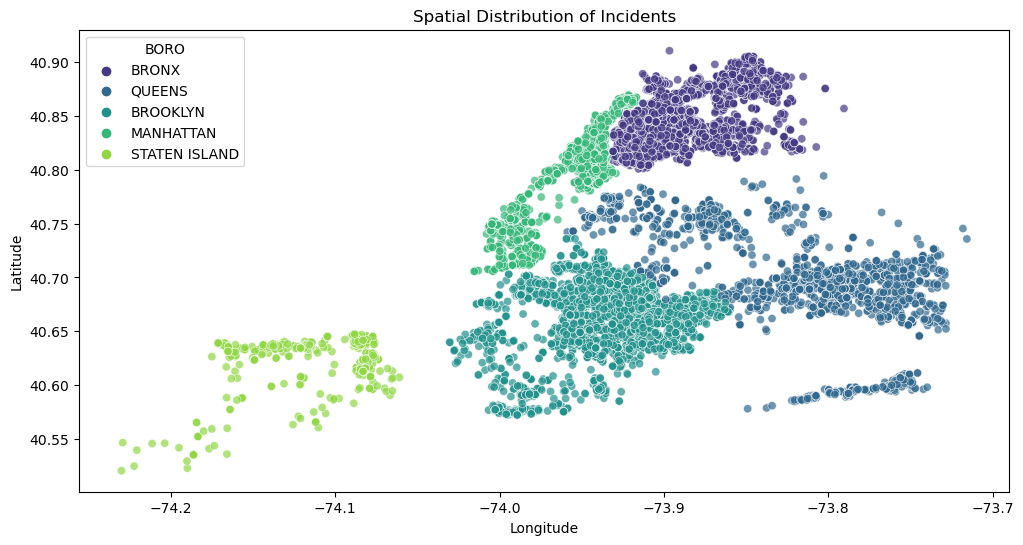

In [58]:
# Spatial Variables (Latitude, Longitude, Location): Scatter plot on a map USING import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df_new_dfnypd, hue='BORO', palette='viridis', alpha=0.7)
plt.title('Spatial Distribution of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='BORO')
plt.show()


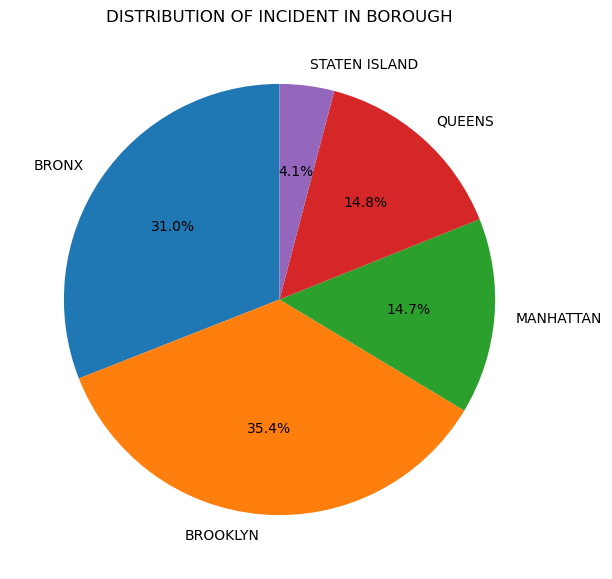

In [59]:
#Plot a pie to view which location shooting incident happened the most
plt.figure(figsize=(7, 7))  # set the size of the pie chart
group1 = df_new_dfnypd[["BORO", "incident_key"]]
group2 = group1.groupby(["BORO"], as_index=False).count()
data = np.array(group2["incident_key"])
mylabels = group2["BORO"]
plt.title('DISTRIBUTION OF INCIDENT IN BOROUGH')
plt.pie(data, labels=mylabels, autopct='%1.1f%%', startangle=90)
plt.show()

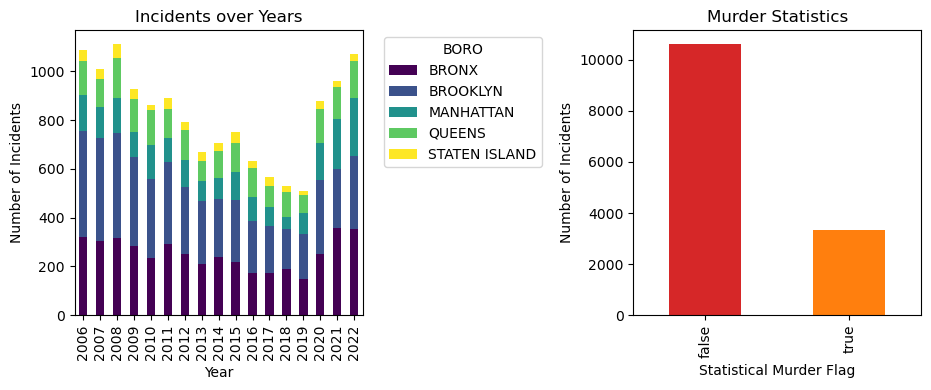

In [60]:
#new_dfnypd['OCCUR_DATE'] = pd.to_datetime(new_dfnypd['OCCUR_DATE']) # Convert OCCUR_DATE to datetime
#new_dfnypd['OCCUR_TIME_NUMERIC'] = new_dfnypd['OCCUR_TIME'].apply(lambda x: x.hour * 60 + x.minute)# Convert OCCUR_TIME to minutes since midnight
df_new_dfnypd['OCCUR_DATE'] = pd.to_datetime(df_new_dfnypd['OCCUR_DATE'])

plt.rcParams['figure.figsize'] = (15, 4)# set the graph
# To visualize Incidents Over Years
ax1 = plt.subplot(1, 3, 1)
df_new_dfnypd[['OCCUR_DATE', 'BORO']].groupby(df_new_dfnypd['OCCUR_DATE'].dt.year)['BORO'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis', ax=ax1)
ax1.set_title('Incidents over Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents')
plt.legend(title='BORO', bbox_to_anchor=(1.05, 1), loc='upper left') #Move legend outside the plot 

# To visualize STATISTICAL_MURDER_FLAG 
ax2 = plt.subplot(1, 3, 2)
df_new_dfnypd['STATISTICAL_MURDER_FLAG'].value_counts().plot(kind='bar', color=['C3', 'C1'], ax=ax2)
ax2.set_title('Murder Statistics')
ax2.set_xlabel('Statistical Murder Flag')
ax2.set_ylabel('Number of Incidents')

plt.tight_layout()
plt.show()

#'PRECINCT'

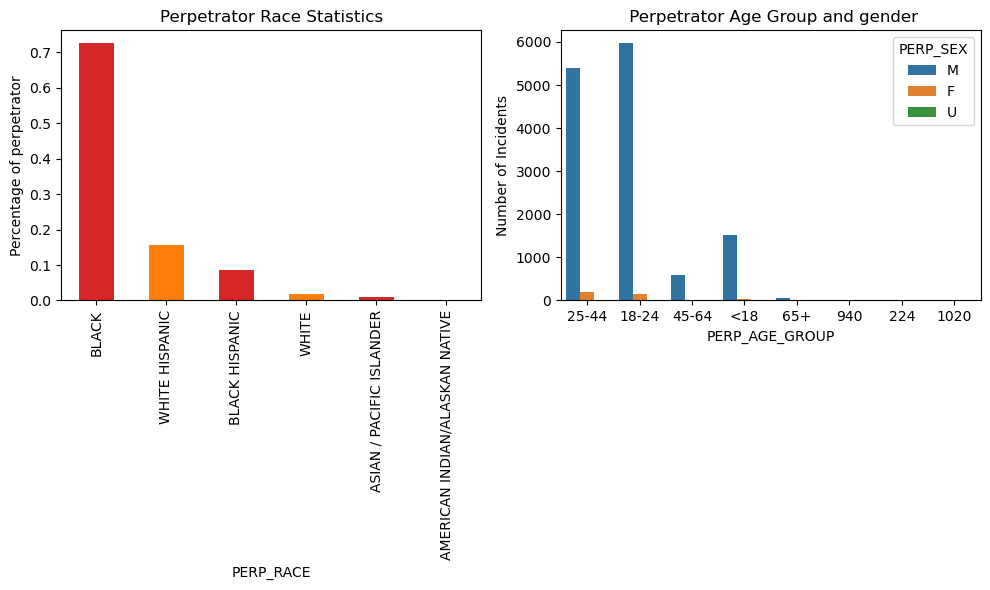

In [61]:
plt.rcParams['figure.figsize'] = (15, 6)# set the graph
# To visualize Perpetrator Race
ax2 = plt.subplot(1, 3, 1)
total_victims = len(df_new_dfnypd["PERP_RACE"])
(df_new_dfnypd["PERP_RACE"].value_counts() / total_victims).plot(kind='bar', color=['C3', 'C1'], ax=ax2)
ax2.set_title("Perpetrator Race Statistics")
ax2.set_xlabel("PERP_RACE")
ax2.set_ylabel('Percentage of perpetrator')

# To visualize Perpetrator Age Group and gender  
ax3 = plt.subplot(1, 3, 2)
sns.countplot(x='PERP_AGE_GROUP', hue='PERP_SEX', data=df_new_dfnypd, palette=['C0','C1', 'C2'], ax=ax3)
ax3.set_title(' Perpetrator Age Group and gender')
ax3.set_xlabel('PERP_AGE_GROUP')
ax3.set_ylabel('Number of Incidents')

plt.tight_layout()
plt.show()

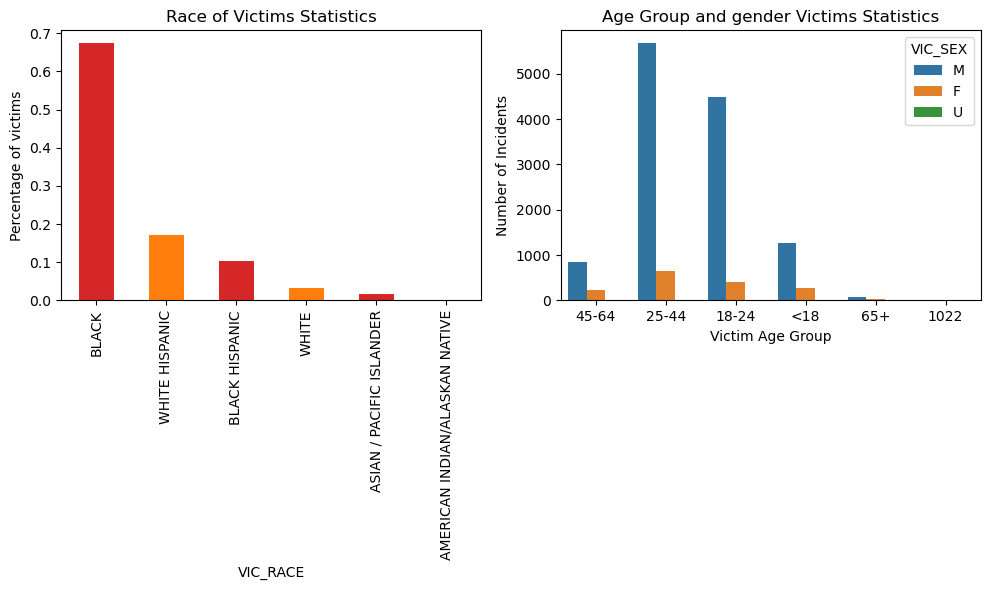

In [62]:
plt.rcParams['figure.figsize'] = (15, 6)# set the graph
# To visualize Race of Victims Statistics
ax2 = plt.subplot(1, 3, 1)
total_victims = len(df_new_dfnypd["VIC_RACE"])
(df_new_dfnypd["VIC_RACE"].value_counts() / total_victims).plot(kind='bar', color=['C3', 'C1'], ax=ax2)
ax2.set_title("Race of Victims Statistics")
ax2.set_xlabel("VIC_RACE")
ax2.set_ylabel('Percentage of victims')

# To visualize Age group and gender of Victims Statistics 
ax3 = plt.subplot(1, 3, 2)
sns.countplot(x='VIC_AGE_GROUP', hue='VIC_SEX', data=df_new_dfnypd, palette=['C0','C1', 'C2'], ax=ax3)
ax3.set_title('Age Group and gender Victims Statistics')
ax3.set_xlabel('Victim Age Group')
ax3.set_ylabel('Number of Incidents')

plt.tight_layout()
plt.show()


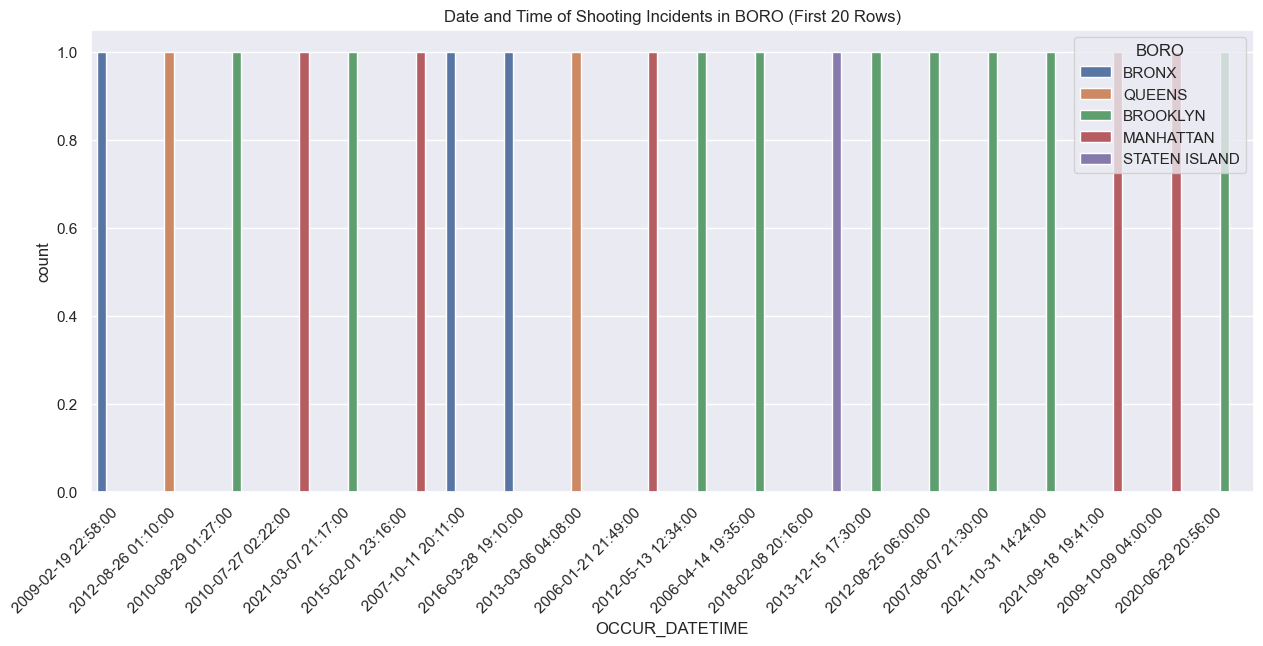

In [63]:
# visualizing the Date and Time of incident
sns.set(rc={'figure.figsize': (15, 6)})# the figure size set using sns.set()
subset_df = df_new_dfnypd.head(20).copy()  # created a copy to stop warning prompt

# To get the time and date of incident we convert 'OCCUR_DATE' and 'OCCUR_TIME' column to datetime. i.e conbine
subset_df['OCCUR_DATETIME'] = pd.to_datetime(subset_df['OCCUR_DATE'].astype(str) + ' ' + subset_df['OCCUR_TIME'].astype(str))

# To plot the subset 
sns.countplot(x="OCCUR_DATETIME", hue="BORO", data=subset_df)
plt.title('Date and Time of Shooting Incidents in BORO (First 20 Rows)')  # Set title separately

plt.xticks(rotation=45, ha='right')
plt.show()



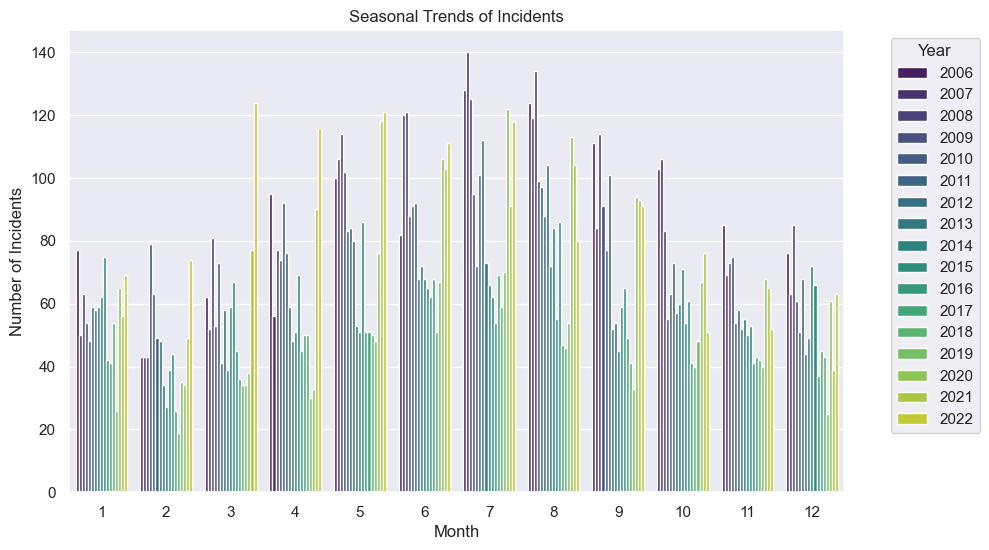

In [64]:
# get month and year from OCCUR_DATE 
df_new_dfnypd['Month'] = df_new_dfnypd['OCCUR_DATE'].dt.month
df_new_dfnypd['Year'] = df_new_dfnypd['OCCUR_DATE'].dt.year

# visualize with grouped bar chart for seasonal trend
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_new_dfnypd, palette='viridis', hue='Year')
plt.title('Seasonal Trends of Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
#plt.legend(title='Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') #Move legend outside the plot 
plt.show()


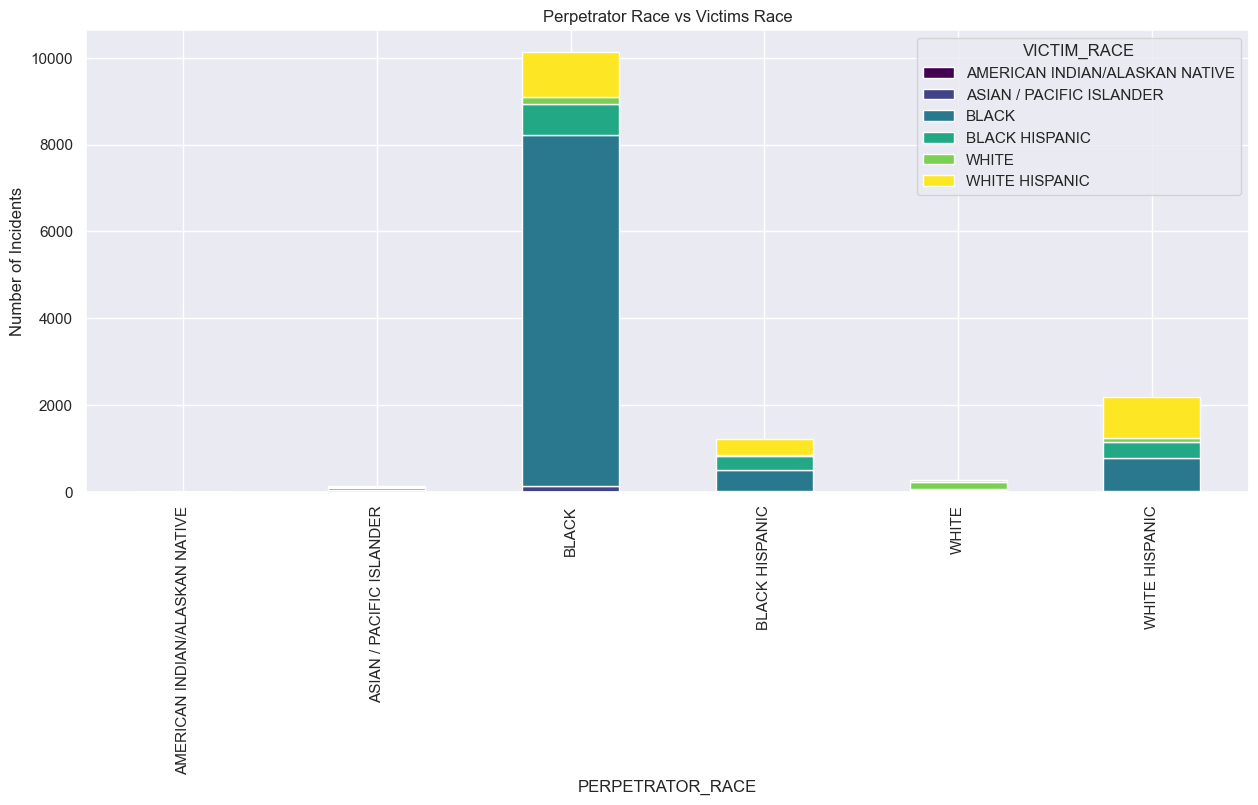

In [65]:
#  plot to show the Race most affected 
df_new_dfnypd[['PERP_RACE', 'VIC_RACE']].groupby(['PERP_RACE', 'VIC_RACE']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Perpetrator Race vs Victims Race')
plt.xlabel('PERPETRATOR_RACE')
plt.ylabel('Number of Incidents')
plt.legend(title='VICTIM_RACE', title_fontsize='12')
plt.show()

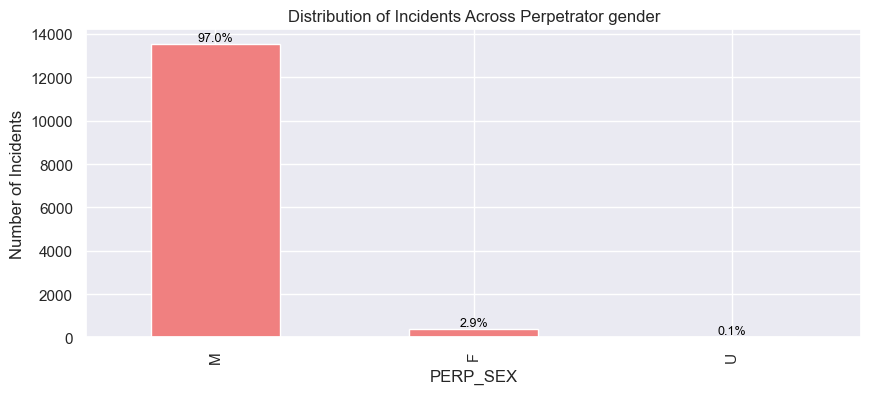

In [66]:
import matplotlib.pyplot as plt
#plot to see the gener which are mostly  involve
plt.rcParams['figure.figsize'] = (10, 4)# Set the figure size
# Create a bar chart
ax = df_new_dfnypd['PERP_SEX'].value_counts().plot(kind='bar', color='lightcoral')
total_incidents = len(df_new_dfnypd['PERP_SEX'])
for bar in ax.patches:
    percentage = f'{100 * bar.get_height() / total_incidents:.1f}%' # Calculate the percentage and format it   
# TO add percentage label at the top of each bar
    ax.annotate(percentage, (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')
# Set plot title and axis labels
plt.title('Distribution of Incidents Across Perpetrator gender')
plt.xlabel('PERP_SEX')
plt.ylabel('Number of Incidents')
plt.show() # Show the plot

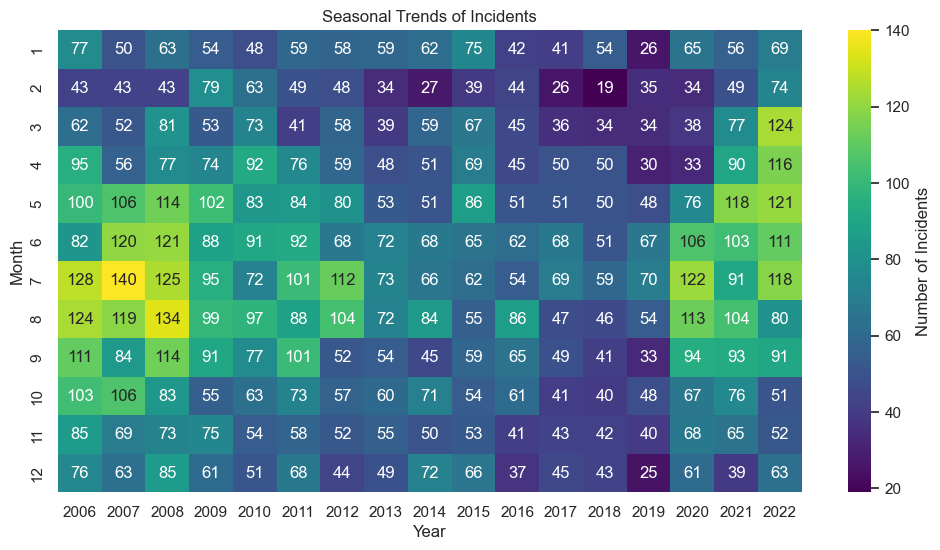

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month and year from OCCUR_DATE
df_new_dfnypd['Month'] = df_new_dfnypd['OCCUR_DATE'].dt.month
df_new_dfnypd['Year'] = df_new_dfnypd['OCCUR_DATE'].dt.year

# Create a heatmap for seasonal trends
plt.figure(figsize=(12, 6))
pivot_table = df_new_dfnypd.pivot_table(index='Month', columns='Year', values='incident_key', aggfunc='count')
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Incidents'})
plt.title('Seasonal Trends of Incidents')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()



In [68]:
#Specify file path to save csv file
csv_file = 'C:/Users/Admin/Desktop/DAP PROJECT/df_new_dfnypd.csv'

#Export dataframe to csv
df_new_dfnypd.to_csv(csv_file, index=False)

In [69]:
data = pd.read_csv("C:/Users/Admin/Desktop/DAP PROJECT/df_new_dfnypd.csv")

In [70]:
data


incident_key  OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  \
0        58921844.0  2009-02-19   22:58:00      BRONX      47.0   
1        86437261.0  2012-08-26   01:10:00     QUEENS     101.0   
2        74363835.0  2010-08-29   01:27:00   BROOKLYN      75.0   
3        73879554.0  2010-07-27   02:22:00  MANHATTAN      30.0   
4       225297069.0  2021-03-07   21:17:00   BROOKLYN      71.0   
...             ...         ...        ...        ...       ...   
13944   245173597.0  2022-05-16   16:50:00      BRONX      41.0   
13945   239583450.0  2022-01-22   13:15:00  MANHATTAN      30.0   
13946   246825728.0  2022-06-18   03:29:00  MANHATTAN      32.0   
13947   246876579.0  2022-06-19   20:08:00      BRONX      46.0   
13948   239861542.0  2022-01-28   18:14:00      BRONX      45.0   

       JURISDICTION_CODE  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  \
0                      0                     True          25-44        M   
1                      0                    False          25-44        M   
2                      0                    False          25-44        M   
3                      0                     True          25-44        M   
4                      0                    False          25-44        M   
...                  ...                      ...            ...      ...   
13944                  0                     True          18-24        M   
13945                  0                    False          25-44        F   
13946                  0                    False          18-24        M   
13947                  2                    False          25-44        M   
13948                  0                    False          18-24        M   

            PERP_RACE VIC_AGE_GROUP VIC_SEX        VIC_RACE    X_COORD_CD  \
0               BLACK         45-64       M           BLACK  1.024922e+06   
1               BLACK         25-44       M           BLACK  1.053937e+06   
2               BLACK         25-44       M           BLACK  1.013136e+06   
3               BLACK         25-44       M           BLACK  9.999674e+05   
4               BLACK         25-44       M           WHITE  9.957920e+05   
...               ...           ...     ...             ...           ...   
13944           BLACK           <18       F  WHITE HISPANIC  1.012932e+06   
13945  WHITE HISPANIC         25-44       M  WHITE HISPANIC  9.974580e+05   
13946           BLACK         25-44       M           BLACK  1.000999e+06   
13947           BLACK         25-44       M  WHITE HISPANIC  1.012980e+06   
13948           BLACK         18-24       M           BLACK  1.026549e+06   

          Y_COORD_CD   Latitude  Longitude  Month  Year  
0      262189.406250  40.886238 -73.852910      2  2009  
1      157130.421875  40.597697 -73.749065      8  2012  
2      179968.000000  40.660608 -73.895887      8  2010  
3      240325.562500  40.826308 -73.943210      7  2010  
4      178767.000000  40.657352 -73.958402      3  2021  
...              ...        ...        ...    ...   ...  
13944  238907.000000  40.822374 -73.896369      5  2022  
13945  240485.000000  40.826743 -73.952273      1  2022  
13946  234464.000000  40.810209 -73.939496      6  2022  
13947  251028.000000  40.855644 -73.896141      6  2022  
13948  244293.000000  40.837102 -73.847134      1  2022  

[13949 rows x 19 columns]

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [72]:
features = data[['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']]
target = data['Month']


In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [74]:
# Create a Linear Regression model
model = LinearRegression()

In [75]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 10.374719834327363
Root Mean Squared Error: 3.220981191240856


In [78]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 3.50657413e-03  4.53461558e-03 -1.65030506e+03 -9.75120405e+02]
Intercept: -9317.129598977199
